In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def stationary(mean=30, scale=10, size=100):
    '''
    mean:  center of a distribution
    scale: width of the distribution
    '''
    stat = np.random.normal(mean, scale, size)
    stat = np.rint(stat)
    return stat

In [3]:
def trendy(k=3, b=3, size=100):
    func = lambda x, k, b: (k*x + b)
    linear = np.array([func(x, k, b) for x in range(1,size+1)])
    return linear
    

In [4]:
def const(b=3, size=100):
    return trendy(0, b, size)

In [24]:
def noise(noise_per=5, amplitude=10, size=100):
    import time
    np.random.seed(int(time.time()))
    noise_per /=100
    noise_high = amplitude
    noise_low = -1 * amplitude
    randoms = np.random.randint(low=noise_low, high=noise_high, size=(int(size * noise_per)))
    noise = np.array([0]*int(size * round(1-noise_per,2)))
    noise = np.concatenate((noise, randoms))
    if len(noise) != size:
        noise = np.append(noise, np.random.randint(low=noise_low, high=noise_high))
    np.random.shuffle(noise)
    return noise

In [11]:
def near_trendy(k=3, b=3, noise_per=5, amplitude=3, size=100):
    tr = trendy(k, b, size)
    nc = noise(noise_per=noise_per, size=size, amplitude=amplitude)
    print("###", len(nc))
    near_t = tr + nc
    return near_t
    

In [7]:
def near_constant(const=5, noise_per=5, amplitude=5, size=100):
    return near_trendy(k=0, b=const, noise_per = noise_per, amplitude=amplitude, size=size)
    

In [8]:
def trend_stationary(k=3, b=3, mean=10, scale=10, size=100):
    linear = trendy(k=k, b=b, size=size)
    stat = stationary(mean=mean, scale=scale, size=size)
    return linear + stat

    

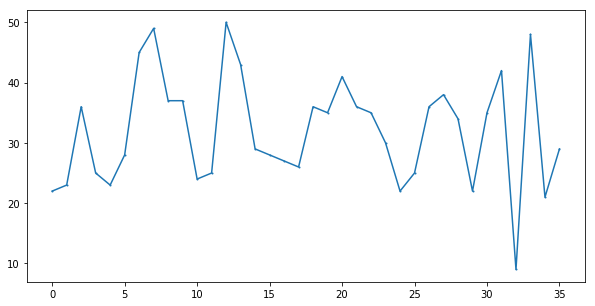

In [28]:
d = {}
d['size']=1000
d['const'] = 50
d['amplitude'] = 5
d['noise_per'] = 30
t_stat = stationary(size=36)

plt.rcParams["figure.figsize"] = [10, 5]
plt.plot(t_stat,marker='o', markersize=1)
plt.show()